In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

sns.set_theme(style="darkgrid")
import warnings
# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
booking_df = pd.read_csv('hotel_booking.csv', encoding='utf-8')
booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119385,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119386,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119387,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 고객 타입별 예약 변경 횟수 비교 및 예약 취소 여부 확인
1. 고객 타입별 예약 변경 횟수 비교
2. ‘booking_changes’ > 0 인 상황에서 예약 취소 여부
3.  ‘booking_changes’ = 0 인 상황에서 예약 취소 여부

## 1. 고객 타입별 예약 변경 횟수 비교

In [7]:
# 예약 변경 횟수를 0, 1, 2, 그 이상으로 구분하는 새로운 열 추가
booking_df['booking_changes_group'] = pd.cut(booking_df['booking_changes'], bins=[-1, 0, 1, 2, float('inf')], labels=['0', '1', '2', '3+'])

booking_changes_group      0     1     2   3+
customer_type                                
Contract                3674   343    41   18
Group                    464    74    31    8
Transient              78116  7964  2566  967
Transient-Party        19060  4320  1166  577


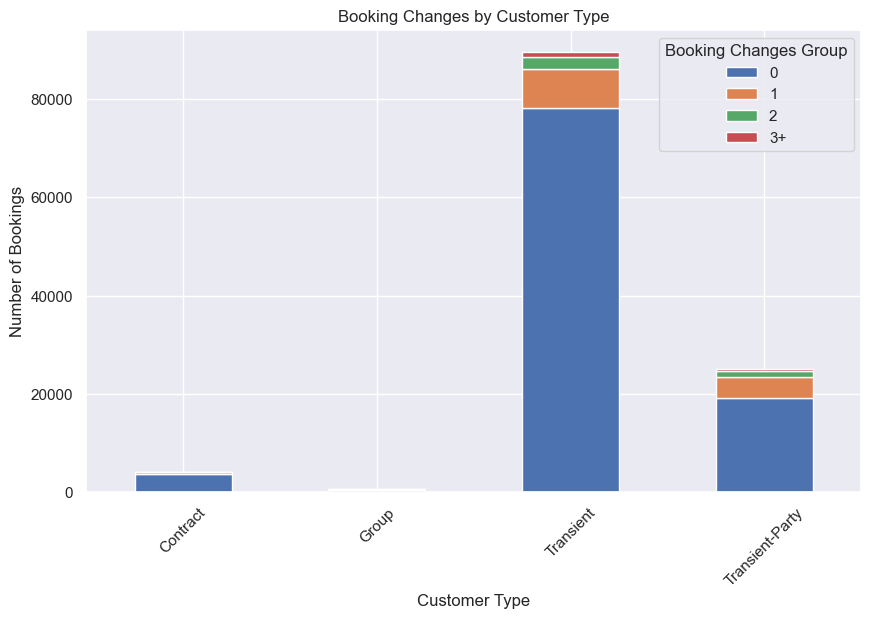

In [10]:
# 고객 유형에 따른 예약 변경 횟수
changes_by_customer_type = booking_df.groupby(['customer_type', 'booking_changes_group']).size().unstack(fill_value=0)

print(changes_by_customer_type)

# 시각화
changes_by_customer_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Booking Changes by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')
plt.show()

### 1-1 고객 타입별 예약 변경 횟수를 비율로 나타낸 것

booking_changes_group         0         1         2        3+
customer_type                                                
Contract               0.901374  0.084151  0.010059  0.004416
Group                  0.804159  0.128250  0.053726  0.013865
Transient              0.871704  0.088871  0.028634  0.010791
Transient-Party        0.758667  0.171954  0.046412  0.022967


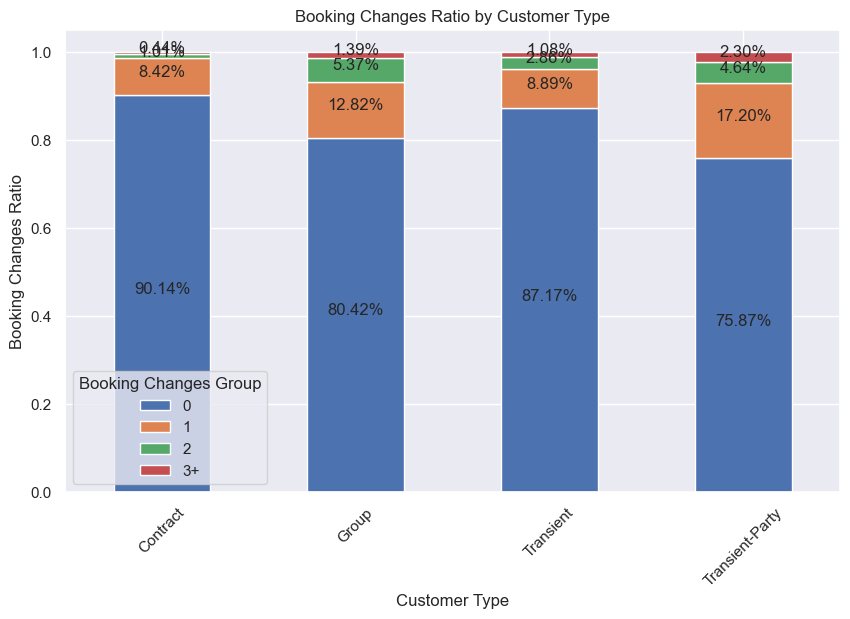

In [11]:
# 고객 유형에 따른 예약 변경 횟수
changes_by_customer_type = booking_df.groupby(['customer_type', 'booking_changes_group']).size().unstack(fill_value=0)

# 예약 변경 횟수의 비율 계산
changes_by_customer_type_ratio = changes_by_customer_type.div(changes_by_customer_type.sum(axis=1), axis=0)

# 결과 출력
print(changes_by_customer_type_ratio)

# 시각화
changes_by_customer_type_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
for i in range(len(changes_by_customer_type_ratio)):
    total = 0
    for j in range(len(changes_by_customer_type_ratio.columns)):
        plt.text(i, total + changes_by_customer_type_ratio.iloc[i, j]/2, f"{changes_by_customer_type_ratio.iloc[i, j]*100:.2f}%", ha="center")
        total += changes_by_customer_type_ratio.iloc[i, j]
plt.title('Booking Changes Ratio by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Booking Changes Ratio')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')
plt.show()

### 1-2 예약 취소했을 때(’is_cancled’ == 1) 고객 타입별 예약 변경 횟수 비율

booking_changes_group         0         1         2        3+
customer_type                                                
Contract               0.965135  0.033281  0.000792  0.000792
Group                  0.864407  0.067797  0.067797  0.000000
Transient              0.939010  0.036780  0.018459  0.005751
Transient-Party        0.913288  0.065425  0.013617  0.007669


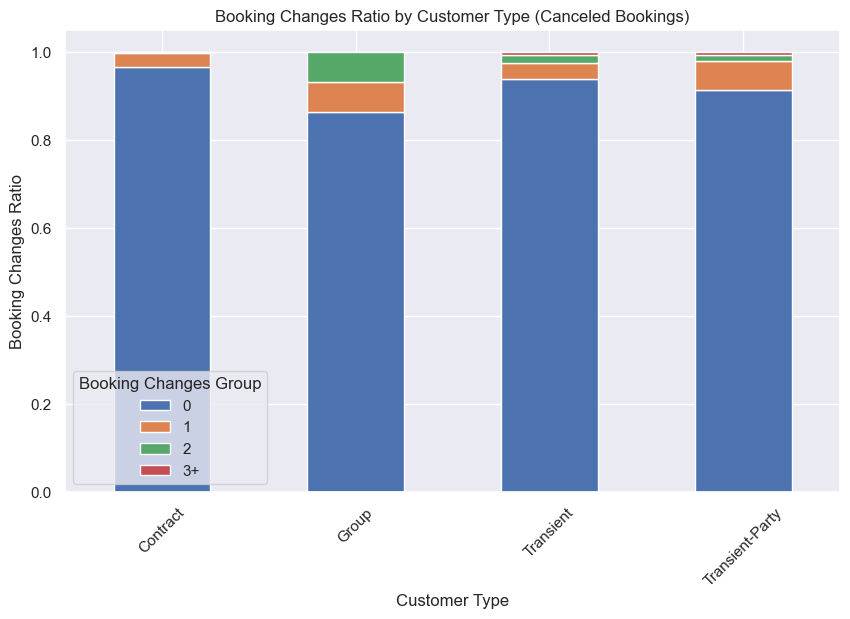

In [12]:
# 'is_canceled'가 1인 경우를 필터링
canceled_bookings = booking_df[booking_df['is_canceled'] == 1]

# 고객 유형에 따른 예약 변경 횟수 
changes_by_customer_type = canceled_bookings.groupby(['customer_type', 'booking_changes_group']).size().unstack(fill_value=0)

# 예약 변경 횟수의 비율 계산
changes_by_customer_type_ratio = changes_by_customer_type.div(changes_by_customer_type.sum(axis=1), axis=0)

print(changes_by_customer_type_ratio)

# 시각화
changes_by_customer_type_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Booking Changes Ratio by Customer Type (Canceled Bookings)')
plt.xlabel('Customer Type')
plt.ylabel('Booking Changes Ratio')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')
plt.show()

### 1-3 예약 취소하지 않았을 때(’is_cancled’ == 0) 고객 타입에 따라 예약 변경 횟수 비율

booking_changes_group         0         1         2        3+
customer_type                                                
Contract               0.872779  0.106965  0.014215  0.006041
Group                  0.797297  0.135135  0.052124  0.015444
Transient              0.825420  0.124692  0.035632  0.014256
Transient-Party        0.705936  0.208284  0.057596  0.028184


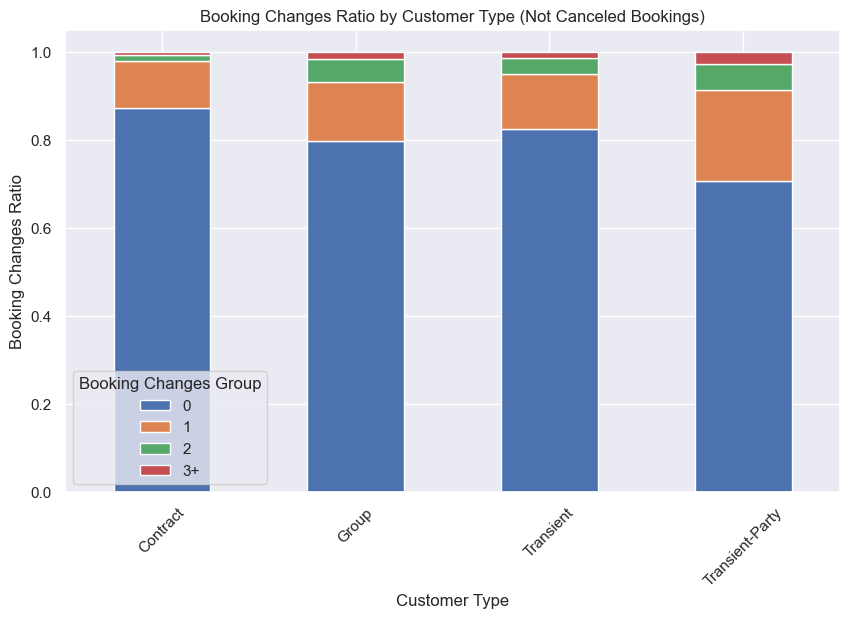

In [13]:
# 'is_canceled'가 0인 경우를 필터링
not_canceled_bookings = booking_df[booking_df['is_canceled'] == 0]

# 고객 유형에 따른 예약 변경 횟수
changes_by_customer_type = not_canceled_bookings.groupby(['customer_type', 'booking_changes_group']).size().unstack(fill_value=0)

# 예약 변경 횟수의 비율을 계산
changes_by_customer_type_ratio = changes_by_customer_type.div(changes_by_customer_type.sum(axis=1), axis=0)
print(changes_by_customer_type_ratio)
# 시각화
changes_by_customer_type_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Booking Changes Ratio by Customer Type (Not Canceled Bookings)')
plt.xlabel('Customer Type')
plt.ylabel('Booking Changes Ratio')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')
plt.show()

In [14]:
booking_df.value_counts('booking_changes')

booking_changes
0     101314
1      12701
2       3804
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
18         1
20         1
21         1
Name: count, dtype: int64

In [15]:
count_booking_changes_greater_than_one = booking_df[booking_df['booking_changes'] > 0]['booking_changes'].count()
print(count_booking_changes_greater_than_one)


18075


## 2.‘booking_changes’ > 0 인 상황에서 예약 취소 여부

2-1 ‘booking_changes’ > 0일 때 고객 타입 별 예약 변경 횟수

booking_changes_group     1     2   3+
customer_type                         
Contract                343    41   18
Group                    74    31    8
Transient              7964  2566  967
Transient-Party        4320  1166  577


/var/folders/yc/9_h98cb53g17y0rny10r2l5w0000gn/T/ipykernel_54151/548947762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_greater_than_one['booking_changes_group'] = pd.cut(changes_greater_than_one['booking_changes'], bins=[0, 1, 2, float('inf')], labels=['1', '2', '3+'])


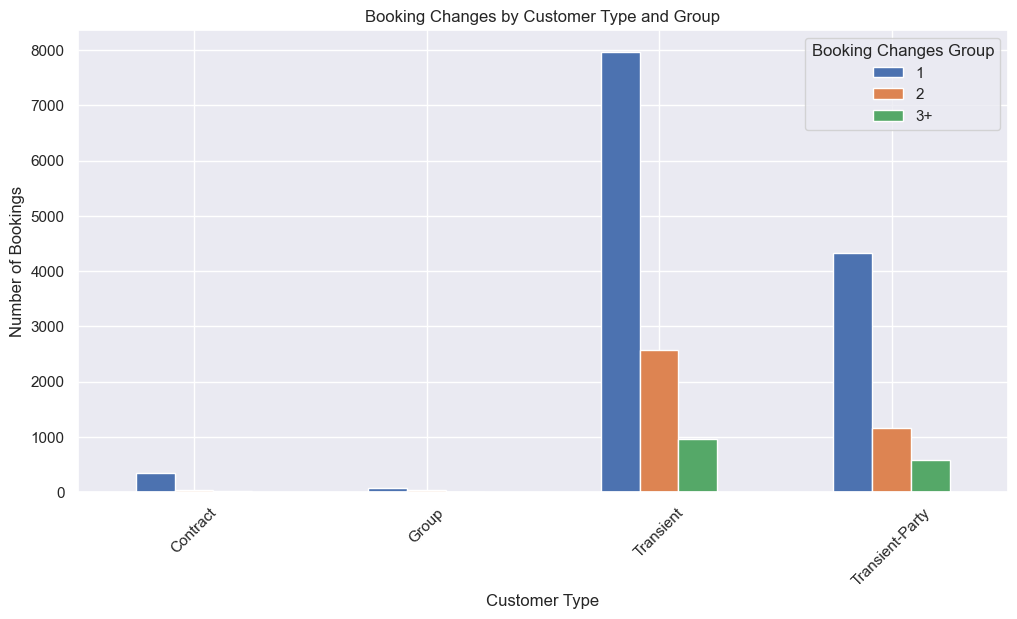

In [16]:
# booking_changes가 1 이상인 경우를 필터링합니다.
changes_greater_than_one = booking_df[booking_df['booking_changes'] > 0]

# booking_changes를 1, 2, 3~5, 6 이상의 범주로 그룹화합니다.
changes_greater_than_one['booking_changes_group'] = pd.cut(changes_greater_than_one['booking_changes'], bins=[0, 1, 2, float('inf')], labels=['1', '2', '3+'])

# 고객 유형별로 그룹화하여 예약 변경 횟수의 평균을 계산합니다.
changes_mean_by_customer_type = changes_greater_than_one.groupby(['customer_type', 'booking_changes_group'])['booking_changes'].count().unstack()
print(changes_mean_by_customer_type)
# 시각화합니다.
changes_mean_by_customer_type.plot(kind='bar', figsize=(12, 6))
plt.title('Booking Changes by Customer Type and Group')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')
plt.show()

2-2 ‘booking_changes’ > 0일 때 고객 타입 별 예약 변경 횟수 비율

/var/folders/yc/9_h98cb53g17y0rny10r2l5w0000gn/T/ipykernel_54151/995833986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_greater_than_one['booking_changes_group'] = pd.cut(changes_greater_than_one['booking_changes'], bins=[0, 1, 2,  float('inf')], labels=['1', '2', '3+'])


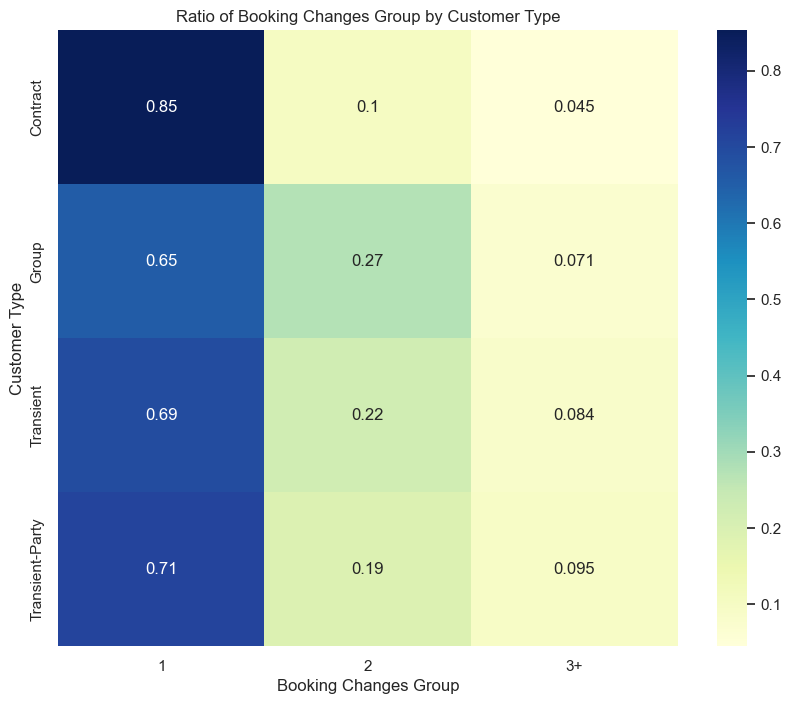

In [17]:
# 'booking_changes' 값에 따라 새로운 카테고리를 만듭니다.
changes_greater_than_one['booking_changes_group'] = pd.cut(changes_greater_than_one['booking_changes'], bins=[0, 1, 2,  float('inf')], labels=['1', '2', '3+'])

# 'customer_type'과 'booking_changes_group'에 따른 빈도를 계산합니다.
grouped_data = changes_greater_than_one.groupby(['customer_type', 'booking_changes_group']).size().reset_index(name='count')

# 'customer_type'별 총 빈도를 계산합니다.
total_counts = grouped_data.groupby('customer_type')['count'].sum()

# 'customer_type'별로 비율을 계산합니다.
grouped_data['ratio'] = grouped_data.apply(lambda row: row['count'] / total_counts[row['customer_type']], axis=1)

# 시각화를 위해 데이터를 재구성합니다.
pivot_data = grouped_data.pivot(index='customer_type', columns='booking_changes_group', values='ratio')

# 시각화합니다.
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu')
plt.title('Ratio of Booking Changes Group by Customer Type')
plt.xlabel('Booking Changes Group')
plt.ylabel('Customer Type')
plt.show()

2-3 'booking_changes' 를 [1, 2, 3+]로 그룹화를 한 후 그룹 타입별 예약 취소 여부 확인

/var/folders/yc/9_h98cb53g17y0rny10r2l5w0000gn/T/ipykernel_54151/3793137493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_greater_than_one_not_canceled['booking_changes_group'] = pd.cut(changes_greater_than_one_not_canceled['booking_changes'], bins=[0, 1, 2, float('inf')], labels=['1', '2', '3+'])
/var/folders/yc/9_h98cb53g17y0rny10r2l5w0000gn/T/ipykernel_54151/3793137493.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_greater_than_one_canceled['booking_changes_group'] = pd.cut(ch

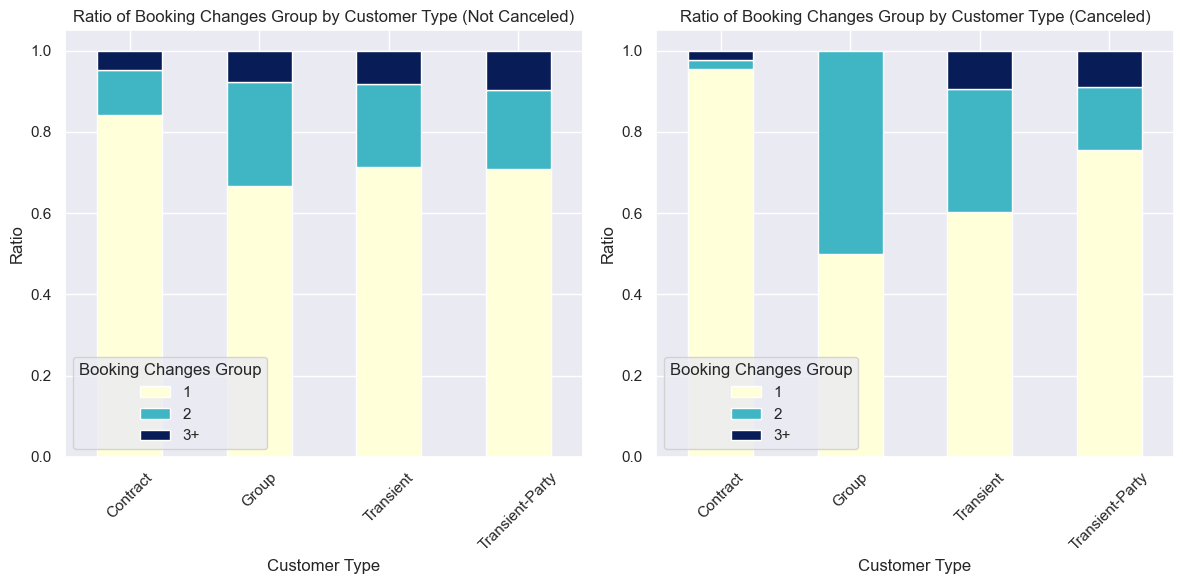

In [19]:
# 'is_canceled'가 0인 경우 필터링
not_canceled_bookings = booking_df[booking_df['is_canceled'] == 0]

# 'booking_changes' 값에 따라 새로운 카테고리 생성
changes_greater_than_one_not_canceled = not_canceled_bookings[not_canceled_bookings['booking_changes'] > 0]
changes_greater_than_one_not_canceled['booking_changes_group'] = pd.cut(changes_greater_than_one_not_canceled['booking_changes'], bins=[0, 1, 2, float('inf')], labels=['1', '2', '3+'])

# 'customer_type'과 'booking_changes_group'에 따른 빈도 계산
grouped_data_not_canceled = changes_greater_than_one_not_canceled.groupby(['customer_type', 'booking_changes_group']).size().reset_index(name='count')

# 'customer_type'별 총 빈도 계산
total_counts_not_canceled = grouped_data_not_canceled.groupby('customer_type')['count'].sum()

# 'customer_type'별로 비율 계산
grouped_data_not_canceled['ratio'] = grouped_data_not_canceled.apply(lambda row: row['count'] / total_counts_not_canceled[row['customer_type']], axis=1)

# 시각화를 위해 데이터 재구성
pivot_data_not_canceled = grouped_data_not_canceled.pivot(index='customer_type', columns='booking_changes_group', values='ratio')



# 'is_canceled'가 1인 경우 필터링
canceled_bookings = booking_df[booking_df['is_canceled'] == 1]

# 'booking_changes' 값에 따라 새로운 카테고리 생성
changes_greater_than_one_canceled = canceled_bookings[canceled_bookings['booking_changes'] > 0]
changes_greater_than_one_canceled['booking_changes_group'] = pd.cut(changes_greater_than_one_canceled['booking_changes'], bins=[0, 1, 2, float('inf')], labels=['1', '2', '3+'])

# 'customer_type'과 'booking_changes_group'에 따른 빈도 계산
grouped_data_canceled = changes_greater_than_one_canceled.groupby(['customer_type', 'booking_changes_group']).size().reset_index(name='count')

# 'customer_type'별 총 빈도 계산
total_counts_canceled = grouped_data_canceled.groupby('customer_type')['count'].sum()

# 'customer_type'별로 비율 계산
grouped_data_canceled['ratio'] = grouped_data_canceled.apply(lambda row: row['count'] / total_counts_canceled[row['customer_type']], axis=1)

# 시각화를 위해 데이터 재구성
pivot_data_canceled = grouped_data_canceled.pivot(index='customer_type', columns='booking_changes_group', values='ratio')

# 시각화
plt.figure(figsize=(12, 6))

# 'is_canceled'가 0인 경우의 시각화
plt.subplot(1, 2, 1)
pivot_data_not_canceled.plot(kind='bar', stacked=True, cmap='YlGnBu', ax=plt.gca())
plt.title('Ratio of Booking Changes Group by Customer Type (Not Canceled)')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')

# 'is_canceled'가 1인 경우의 시각화
plt.subplot(1, 2, 2)
pivot_data_canceled.plot(kind='bar', stacked=True, cmap='YlGnBu', ax=plt.gca())
plt.title('Ratio of Booking Changes Group by Customer Type (Canceled)')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Booking Changes Group')

plt.tight_layout()
plt.show()

## 3.  ‘booking_changes’ = 0 인 상황에서 예약 취소 여부

3-1 ‘booking_changes’= 0일 때 고객 타입별 예약 취소 여부

is_canceled          0      1
customer_type                
Contract          2456   1218
Group              413     51
Transient        43829  34287
Transient-Party  13225   5835


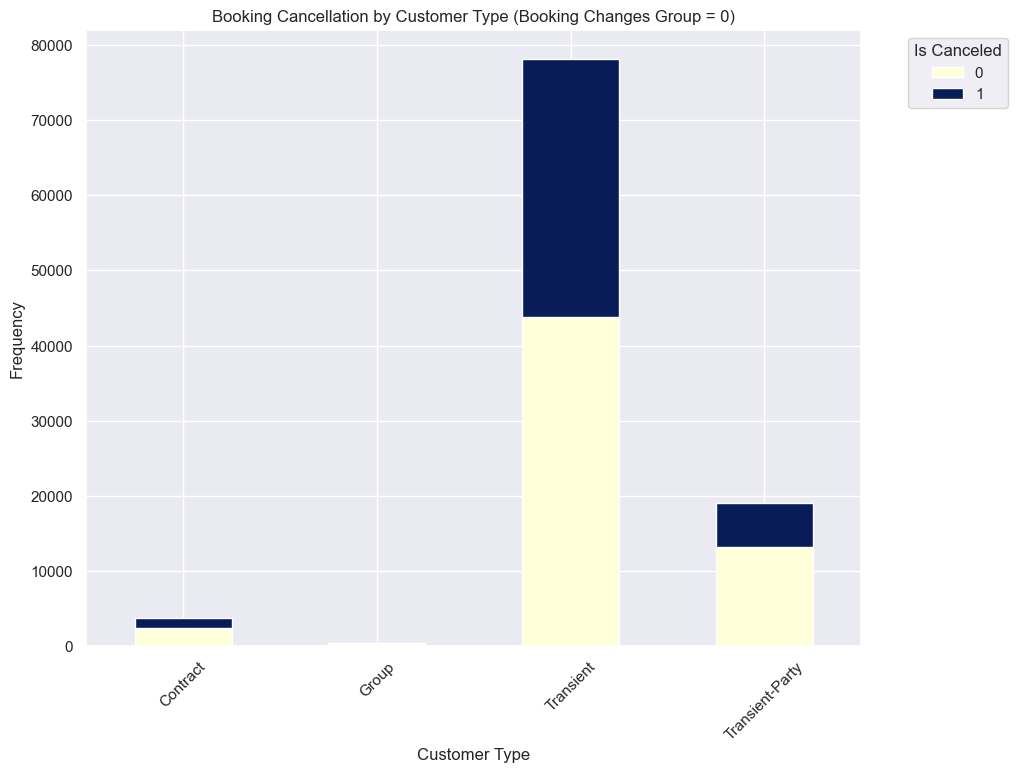

In [22]:
# 'booking_changes_group'의 labels가 0인 경우 필터링합니다.
booking_changes_group_0 = booking_df[booking_df['booking_changes_group'] == '0']

# 'customer_type'에 따라 'is_canceled'가 0과 1일 때의 빈도를 계산합니다.
grouped_data = booking_changes_group_0.groupby(['customer_type', 'is_canceled']).size().unstack()
print(grouped_data)
# 시각화합니다.
grouped_data.plot(kind='bar', stacked=True, cmap='YlGnBu')
plt.title('Booking Cancellation by Customer Type (Booking Changes Group = 0)')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3-2 ‘booking_changes’= 0일 때 고객 타입별 예약 취소 여부 비율

0    0.668481
1    0.331519
2    0.890086
3    0.109914
4    0.561076
5    0.438924
6    0.693861
7    0.306139
Name: ratio, dtype: float64


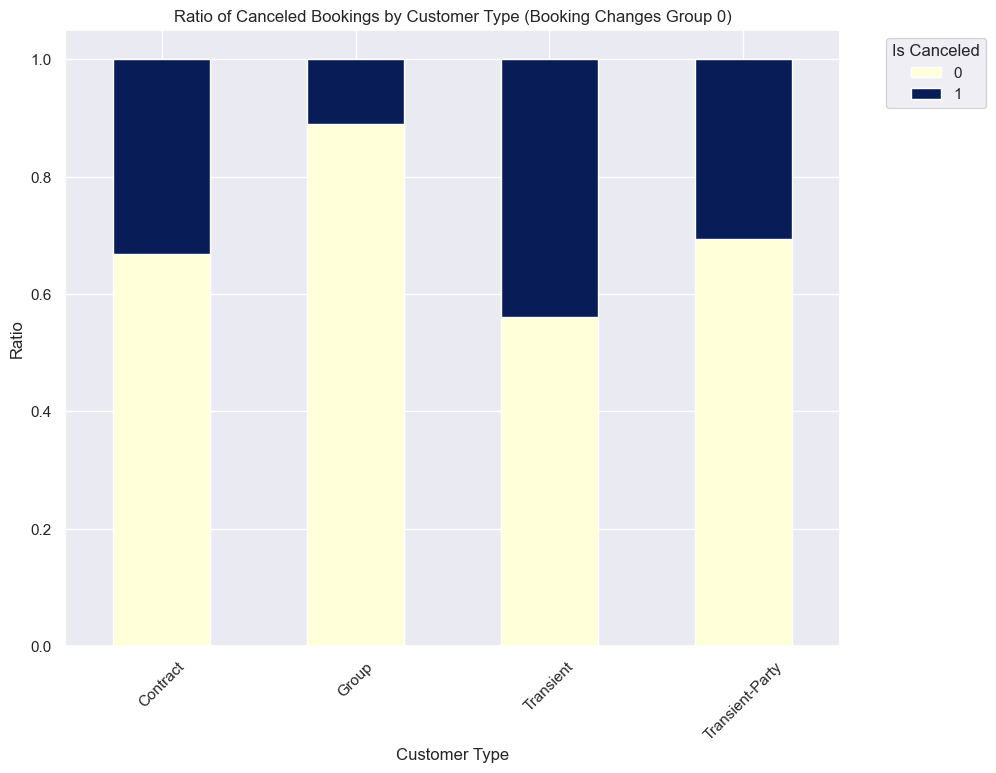

In [21]:
# 'booking_changes_group'의 labels가 0인 경우 필터링합니다.
booking_changes_group_0 = booking_df[booking_df['booking_changes_group'] == '0']

# 'customer_type'과 'is_canceled'에 따른 빈도를 계산합니다.
grouped_data = booking_changes_group_0.groupby(['customer_type', 'is_canceled']).size().reset_index(name='count')

# 'customer_type'별 총 빈도를 계산합니다.
total_counts = grouped_data.groupby('customer_type')['count'].sum()

# 'customer_type'별로 비율을 계산합니다.
grouped_data['ratio'] = grouped_data.apply(lambda row: row['count'] / total_counts[row['customer_type']], axis=1)

# 시각화를 위해 데이터를 재구성합니다.
pivot_data = grouped_data.pivot(index='customer_type', columns='is_canceled', values='ratio')
print(grouped_data['ratio'])
# 시각화합니다.
pivot_data.plot(kind='bar', stacked=True, cmap='YlGnBu')
plt.title('Ratio of Canceled Bookings by Customer Type (Booking Changes Group 0)')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
